In [1]:
import optidex as dx
import numpy as np
import pandas as pd

In [2]:
def get_model_matrix(data, order, interactions_only=False, bias=True) -> pd.DataFrame:
    """
    :param pd.DataFrame data: Design matrix
    :param int order: Order of the polynomial (1-main effects, 2-quadratic effects, ...)
    :param bool interactions_only: Include terms as x1^2 or not
    :param bool bias: Include a beta_0 on the design matrix or not
    Generate the model matrix of a design matrix (argument)
    """
    from sklearn.preprocessing import PolynomialFeatures

    poly = PolynomialFeatures(order, interaction_only=interactions_only, include_bias=bias)
    df = pd.DataFrame(poly.fit_transform(data))
    df.columns = poly.get_feature_names(data.columns)
    return df

In [3]:
def poly_basis(start=-1, stop=1, order=3, bias=True):
    X = pd.DataFrame(np.linspace(start, stop, 50), columns=['x1'])
    XX = get_model_matrix(data=X, order=order, bias=bias)
    w = pd.DataFrame([3, 1 ,0.9, 1], index=XX.columns)
    return (XX @ w), XX

<AxesSubplot:>

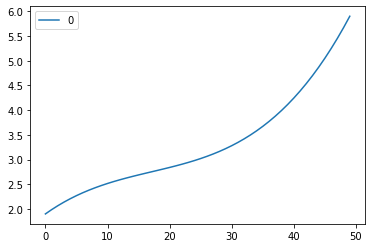

In [4]:
data, model_mat = poly_basis(start=-1, stop=1, order=3, bias=True)
data.plot()

In [5]:
model_mat

,1,x1,x1^2,x1^3
0,1.0,-1.000000,1.000000,-1.000000
1,1.0,-0.959184,0.920033,-0.882481
2,1.0,-0.918367,0.843399,-0.774550
3,1.0,-0.877551,0.770096,-0.675798
4,1.0,-0.836735,0.700125,-0.585819
5,1.0,-0.795918,0.633486,-0.504203
6,1.0,-0.755102,0.570179,-0.430543
7,1.0,-0.714286,0.510204,-0.364431
8,1.0,-0.673469,0.453561,-0.305459
9,1.0,-0.632653,0.400250,-0.253219


In [6]:
des_1 = dx.Optimal(experiments=10,
                  levels={
                      0: [-1, 0, 1],
                      1: [-5, 5],
                      2: [-1, 0, 1],
                      3: [-1, 0, 1]
                  })
des_1.set_model(order=2, interactions_only=False, bias=True)
des_1.set_algorithm(engine="det", epochs=100)
des_1.__dict__

{'experiments': 10,
 'levels': {0: [-1, 0, 1], 1: [-5, 5], 2: [-1, 0, 1], 3: [-1, 0, 1]},
 'features': 4,
 'order': 2,
 'interactions_only': False,
 'bias': True,
 'epochs': 100,
 'engine': 'det'}

In [7]:
des_2 = dx.Functional(experiments=10,
                      levels={
                          0: [-1, 0, 1],
                          1: [-5, 5],
                          2: [-1, 0, 1],
                          3: [-1, 0, 1]
                      })
des_2.__dict__

TypeError: __init__() missing 2 required positional arguments: 'f_basis' and 'b_basis'

In [ ]:
f_des = dx.Functional(experiments=10,
                      levels={
                          0: [-1, 0, 1],
                          1: [-5, 5],
                          2: [-1, 0, 1],
                          3: [-1, 0, 1]
                      })

In [ ]:
f_des.set_model(order=2)

In [ ]:
f_des.set_algorithm(epochs=100, engine='det')

In [ ]:
f_des.__dict__

In [ ]:
f_des.test()

In [ ]:
t = np.linspace(-1,1)
((t>0) & (t<0.5))*t

In [ ]:
def tanh(t, c):
    return (np.exp(t + c) - np.exp(c - t)) / (np.exp(t + c) + np.exp(c - t))

In [ ]:
# W = np.array([3, -5, 6, -2])
c_t = np.array([1, tanh(t, -1), tanh(t, 0), tanh(t, 1)])


In [ ]:
from basis import *

In [ ]:
t = smp.symbols('t')
scaling = evaluate(vec1=sigmoid(x=t, centers=[-1,0,1]),
                   vec2=sigmoid(x=t, centers=[-1,0,1]),
                   symbol=t,
                   lower=0,
                   upper=1)
scaling

In [ ]:
a = tanh(x=t, centers=[-1, 0, 1])
w = [1,-1,2,2]
smp.plot(w @ a.T)

In [ ]:
a = step(x=t, centers=[0,1], h=-1)
a

In [ ]:
smp.Piecewise(1, ((t>-1) & (t<0)), 0)

In [ ]:
c_t = np.append(1, np.array([smp.Piecewise((1, ((t>-1) & (t<=-0.5))), (0, True)),
                             smp.Piecewise((1, ((t>-0.5) & (t<=0))), (0, True)),
                             smp.Piecewise((1, ((t>0) & (t<=0.5))), (0, True)),
                             smp.Piecewise((1, ((t>0.5) & (t<=1))), (0, True))]))
c_t

In [ ]:
# Not needed
def divide(number, parts):
    '''
    number is the last number of the range and parts is no. of intervals you
    want to make
    '''
    chunksize = number/parts              # size of each interval
    chunkstart = 1                        # start of interval
    chunkend = chunkstart + chunksize -1  # end of that interval
    while chunkstart < number:            # don't go beyond the range
        if chunkend > number:             # interval end is beyond the range
            print(chunkstart, number)
            break                         # we are beyond the range now
        print(chunkstart, chunkend)
        chunkstart += chunksize           # take me to beginning of next interval
        chunkend += chunksize             # also tell me where to end that

In [ ]:
divide(102,5)

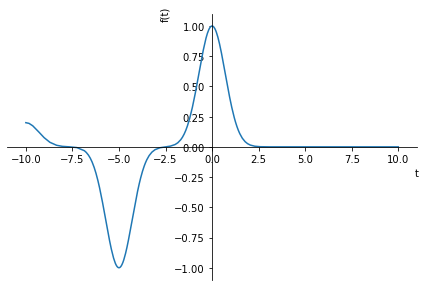

In [8]:
import sympy as smp
from basis import *
t = smp.symbols('t')

c_t = gaussian_k(x=t, centers=[0, 5, 10], h=1).reshape((-1,))
w_c_t = [0, 1, -1, 0.2]

smp.plot(w_c_t @ c_t)

---

In [ ]:
import time
T = smp.symbols('T')
t = smp.symbols('t')

c_t = relu(t, centers=[-1,1])
b_t = swish(t, centers=[-1,1])
mult = c_t @ b_t.T
mult

In [ ]:
start = time.time()
MM = smp.Matrix(mult).integrate((t,0,1)).evalf()
end = time.time()
MM

In [ ]:
mult[0,1]

In [ ]:
from scipy.integrate import quad

In [ ]:
f = lambda x: np.append(1, np.array(np.log(x)))
quad(f, 1, 2)[0]

In [ ]:
f = lambda x,a : a*x

f_1 = lambda x,c : max(0, x+c)
f_2 = lambda x,c : max(0, x+c)

expr = f_1()

quad(f_1, 0, 1, args=(-1,))[0]

0.0

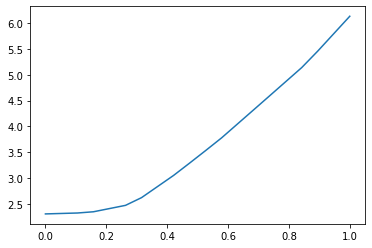

In [262]:
############################################ IMPORTANT #######################################################
# Numerical solution to basis functions
from matplotlib import pyplot as plt
import random

# Basis Function
def numrelu(x, centers):
    """
    Relu function for numerical evaluation
    """
    return np.vstack([[1]*x.shape[0], np.array([(x-c)*(x>c) for c in centers])]).T

def reconstruct_function(x, w_x):
    """
    pass x and w and combine them correctly to reconstruct on row of the functional design.
    """
    return np.sum((x * w_x).T, axis=0)


def gen_random_design(dims):
    experiments = dims[0]
    features = dims[1]
    df = pd.DataFrame(np.random.random((experiments, features)))
    df.columns = ['w' + str(x) for x in list(range(features))]
    return df

# set t limits
# define c_t
# define weights
# add together on x_0_t (approximation)

detail = 20
n_exp = 50
x_centers = 8
b_centers = 3
t = np.linspace(0, 1, detail)
dt = t[0] - t[1]

# Define basis and centers
c_t = numrelu(x=t, centers=np.linspace(0,1,x_centers).tolist())
b_t = numrelu(x=t, centers=np.linspace(0,1,b_centers).tolist())

# Start with random design matrix
W = 3*gen_random_design((n_exp, x_centers+1))

# Generate model matrix
J_cgb = W @ np.cumsum((c_t.T @ b_t)/detail, axis=1) * dt
Z = np.append(np.array([1]*J_cgb.shape[0]).reshape((J_cgb.shape[0],1)), J_cgb, axis=1)

# Calculate Criterion
d_opt_criterion = np.linalg.det(Z.T @ Z) # <-------------

# Change W matrix in order to maximize d_opt_criterion
# TODO: figure out what are low and high values for W elements, in order to keep
# TODO: reconstruct_function(c_t, np.array(W.iloc[i, :]))) into (-1,1).
# TODO: For now we can keep low=-1, high=1.

plt.plot(t, reconstruct_function(c_t, np.array(W.iloc[15, :])))


In [259]:
t = np.linspace(-1,1,5)

relu_basis = numrelu(x=t, centers=np.linspace(-1,1,10).tolist())
basis_mat = pd.DataFrame(relu_basis)

weights_mat = pd.DataFrame(
    data={"w_0": [0, -1, -2]})


x_0_t_approx = reconstruct_function(x=basis_mat, w_x=weights_mat["w_0"])

In [246]:
############################################ IMPORTANT #######################################################
detail = 1000
t = np.linspace(0, 1, detail)
c_t = numrelu(x=t, centers=[0,0.5,1])
b_t = numrelu(x=t, centers=[0,0.5,1])
J_cb = (c_t @ b_t.T)/detail
J_cgb = w_c_t @ J_cb

J_cb
# np.cumsum(c_t, axis=1) * (t[0] - t[1])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1000 is different from 4)

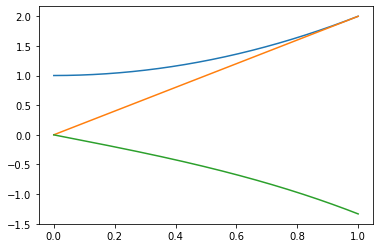

In [30]:
# Example of derivative and gradient calculation
detail = 1000
t = np.linspace(0, 1, detail)
c_t = t**0 + t**2

derivative = np.gradient(c_t, t)
integral = np.cumsum(c_t) * (t[0] - t[1])

plt.plot(t, c_t)
plt.plot(t, derivative)
plt.plot(t, integral)

##### Testing Functional design potential input

In [1]:
import optidex as dx
import numpy as np
import pandas as pd

In [6]:
f_des = dx.Functional(experiments=10,
                      f_basis={
                          0: "relu",
                          1: "relu"
                      },
                      f_centers={
                          0: [-1, 0, 1],
                          1: [-5, 5]
                      },
                      b_basis={
                          0: "relu",
                          1: "rbf"
                      },
                      b_centers={
                          0: [-1, 1],
                          1: [-1,-0.5, 0, 0.5, 1]
                      },
                      t=np.linspace(0,1,500),
                      epochs=10)
f_des.fit_functional()

0